## To find out the anomalies present in the data for any apps in the sample dataset of ADX

ADX is an ad exchange platform for large publishers with significant sales. It supports both Web
and mobile apps & game inventories. Through ADX, publishers can sell their ad inventory to
advertisers and agencies using real-time bidding technology. AdX provides more efficient usage of
ad spaces using real-time auctions.

A sample dataset with data for a few apps which uses ADX is given from the month of October.
You need to find out if there is any anomaly present in the data for any of the apps present
in the sample dataset. The metrics you can look into are the requests, impressions, clicks,
revenue, show-rate( impressions/responses ), click-rate (clicks/impressions) or any other feature
which you think will be helpful to gain more insight about any anomaly.

In [102]:
#Loading the dataset

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Q4_ADX_Sample_data.csv', parse_dates = ['date'])
data.head(5)

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392


In [103]:
data.shape

(47935, 10)

We have 47935 records and 10 features in the sample dataset.

In [104]:
#Checking whether there are any duplicate records.
duplicate = data[data.duplicated()]
duplicate

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue


We don't have any duplicate data in the dataset.

In [105]:
data.dtypes

date              datetime64[ns]
pub_id                     int64
app_id                     int64
ad_unit_code               int64
country                   object
requests                   int64
ae_responses               int64
ae_impressions             int64
ae_clicks                  int64
ae_revenue               float64
dtype: object

#Data Definition:

Name           Type            Comments

`date`        (`DATE`)      :      Date on which the report log was recorded

`pub_id`      (`STRING`)    :      Unique ID of a Publisher. Publisher is the one who owns a particular app and wants to monetize                                  by offering ad-space on his/her app

`app_id`      (`STRING`)    :      Unique ID of the app 

`ad_unit_code`(`STRING`)    :      Unique ID of an ad_placement_unit space given for a particular app. Can be more than 1 unit                                      code for a single app

`country`     (`STRING`)    :      Country from which the ad requests came

`requests`    (`INTEGER`)   :      The number of time an ad was requested by the app

`responses`   (`INTEGER`)   :      The number of times has the network responded with an Ad for a particular ad_request

`impressions` (`INTEGER`)   :      When an ad has been served to the mobile device, it needs to be shown on the screen. Once the                                    ad is displayed it is counted as an impression

`clicks`      (`INTEGER`)   :      Clicks coming after the ad is being rendered on the screen

`revenue`     (`NUMERIC`)   :      Total revenue made by the app in USD

In [106]:
#Number of unique values in each columns
data.nunique()

date                 31
pub_id                9
app_id               10
ad_unit_code         56
country             204
requests           3783
ae_responses       3636
ae_impressions     2448
ae_clicks           481
ae_revenue        43914
dtype: int64

#### Feature Engineering

We can add the columns 'show-rate' and 'click-rate' to the dataset.

`show-rate`( impressions/responses ) 
`click-rate` (clicks/impressions)

In [107]:
data['show-rate'] = data['ae_impressions']/data['ae_responses']
data['click-rate'] = data['ae_clicks']/data['ae_impressions']
data.sample(2)

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show-rate,click-rate
14579,2022-10-09,281,40931528,22827806057,Nepal,48,48,16,0,0.020351,0.333333,0.000000
40044,2022-10-12,72,84650721,22477473702,Uzbekistan,142,141,136,12,0.263826,0.964539,0.088235


In [108]:
#Extracting date features from the 'date' column

#User defined function.
import numpy as np

def extract_date_features(df):

    df['Year'] = pd.to_datetime(df['date']).dt.year

    df['Month'] = pd.to_datetime(df['date']).dt.month

    df['Day'] = pd.to_datetime(df['date']).dt.day

    return df

In [109]:
data = extract_date_features(data)
data.sample(3)

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show-rate,click-rate,Year,Month,Day
6847,2022-10-09,14,22693095,22752080475,Georgia,257,248,133,26,0.764879,0.536290,0.195489,2022,10,9
23400,2022-10-31,51,47862278,22545828789,South Africa,76,76,58,0,0.004882,0.763158,0.000000,2022,10,31
21868,2022-10-01,51,47862278,22521510441,Nigeria,366,352,164,1,0.041075,0.465909,0.006098,2022,10,1


#### Checking for missing values

date              0
pub_id            0
app_id            0
ad_unit_code      0
country         420
               ... 
show-rate         0
click-rate        0
Year              0
Month             0
Day               0
Length: 15, dtype: int64


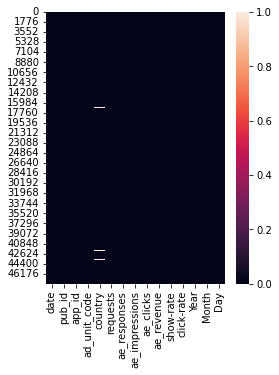

In [110]:
#Train data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [4,5])
sns.heatmap(data.isnull())
print(data.isnull().sum())

We can see that the column 'country' is having 420 missing values.

In [111]:
missing_percent = 420/47935*100
missing_percent

0.876186502555544

The missing value percent compared to total data is less than 1%. Since the column 'country' is having string data, we can impute the missing values with the mode value of the column.

In [112]:
#imputing the mode value for missing values in the columns.
for i in ['country']:
    data[i].fillna(data[i].mode()[0],inplace = True)

date            0
pub_id          0
app_id          0
ad_unit_code    0
country         0
               ..
show-rate       0
click-rate      0
Year            0
Month           0
Day             0
Length: 15, dtype: int64


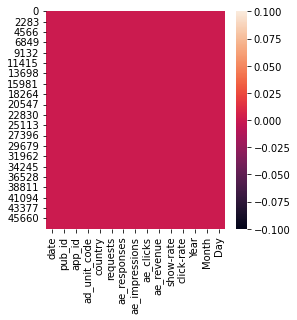

In [113]:
#Train data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [4,4])
sns.heatmap(data.isnull())
print(data.isnull().sum())

### Data Visualization

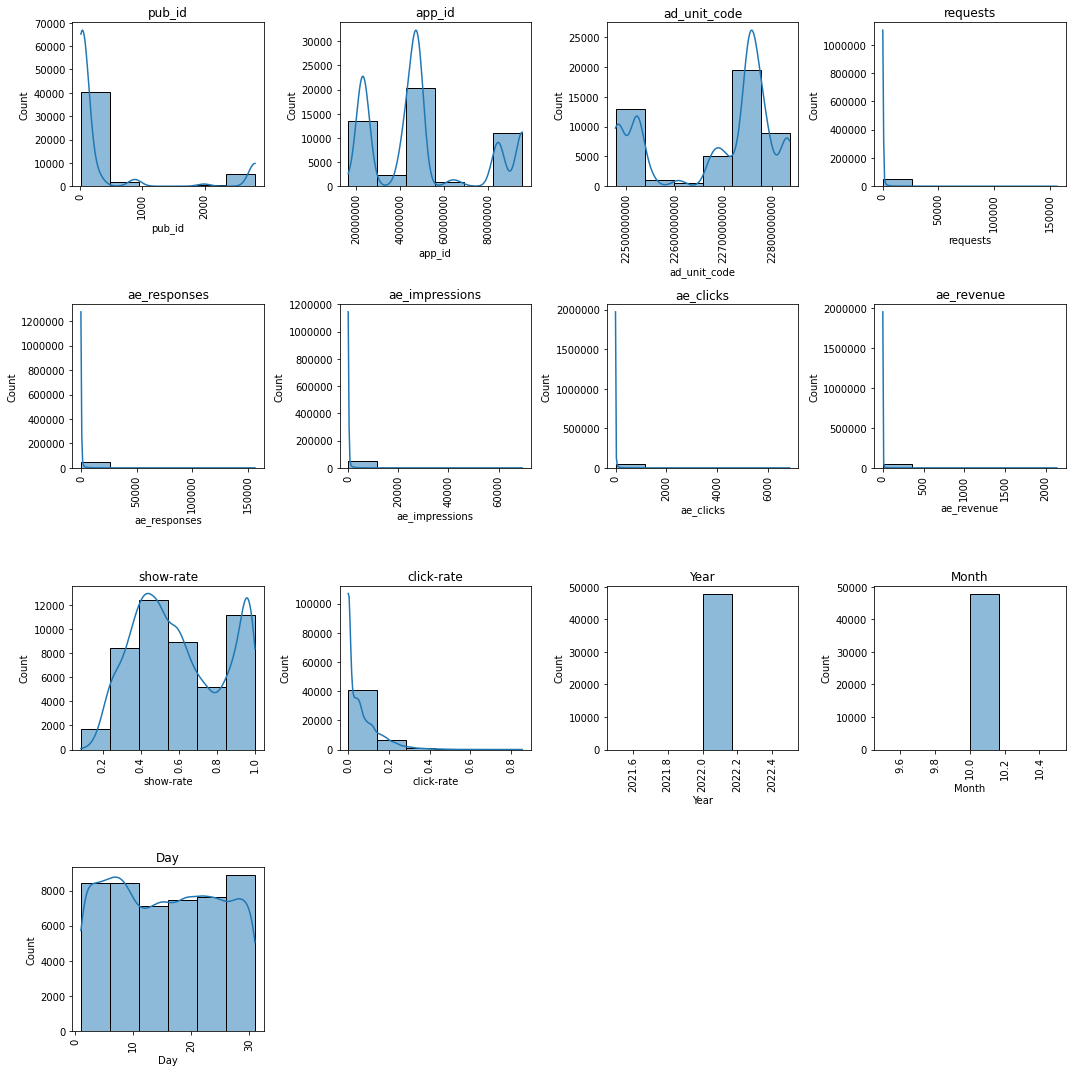

In [116]:
#plotting the numerical variables in the dataset. 
import numpy as np
plt.figure(figsize = [15,15])
a = 1
for i in data.drop(['date','country'], axis = 1).columns:
    plt.subplot(4,4,a)
    sns.histplot(x =i,data = data,bins =6,kde=True)
    plt.xticks(rotation = 90)
    plt.title("{}".format(i))
    ax = plt.gca()
    ax.ticklabel_format(style='plain')
    a+= 1
plt.tight_layout()

* The columns ['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue','click-rate'] are not showing a normal distribution of data and there can be presence of extreme outliers in these columns.

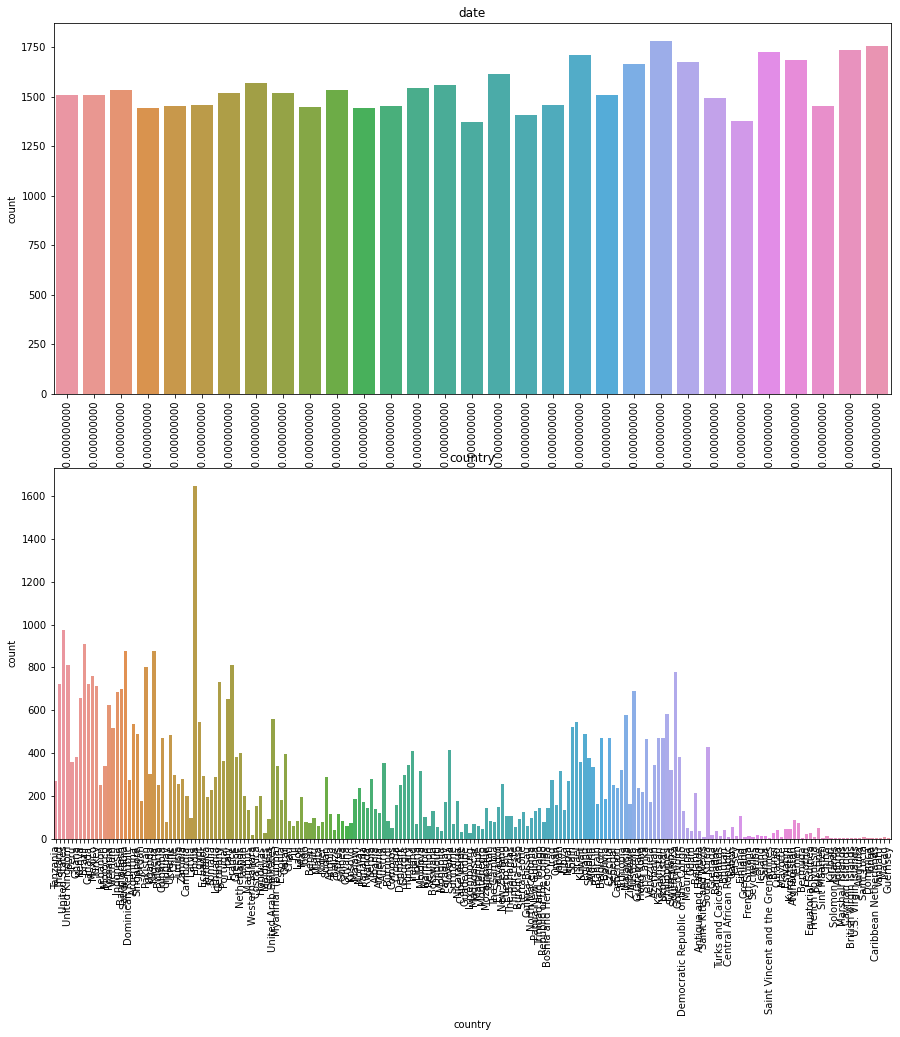

In [42]:
#plotting the data in columns 'date' and 'country'
plt.figure(figsize = [15,15])
a = 1
for i in ['date','country']:
    plt.subplot(2,1,a)
    sns.countplot(data[i])
    plt.xticks(rotation = 90)
    plt.title("{}".format(i))
    ax = plt.gca()
    a+= 1

* It is visible that none of the data points are having extreme distributions. Most of them are within the normal distribution range

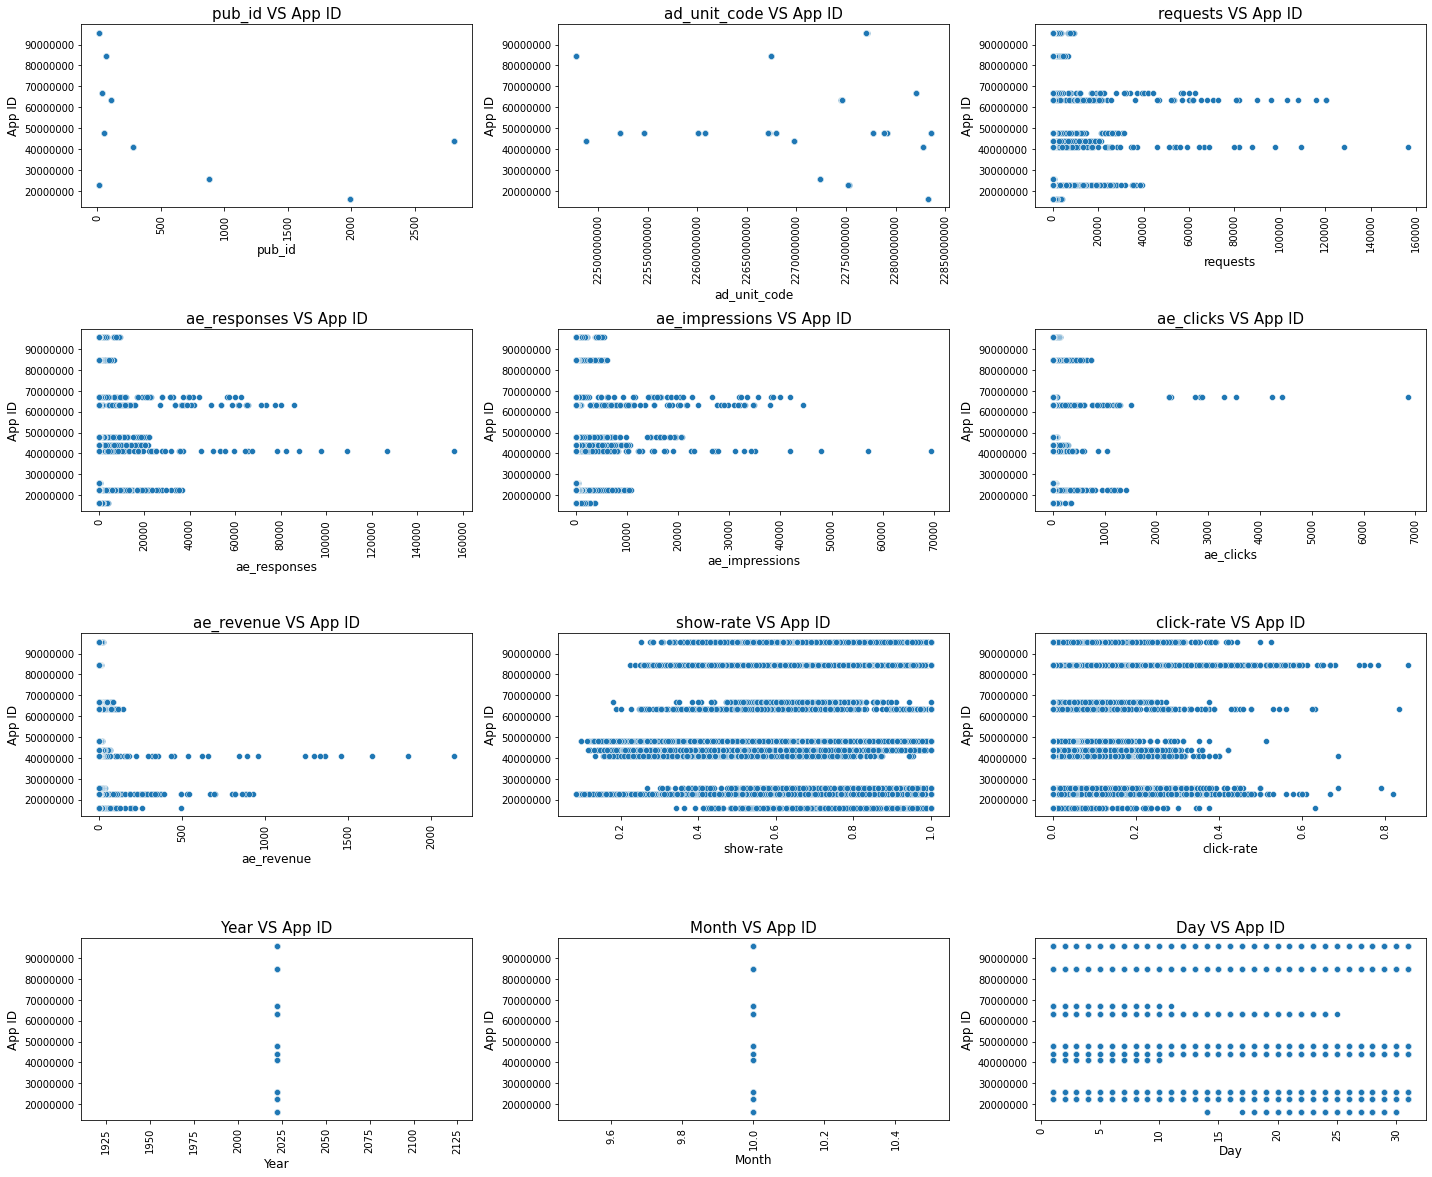

In [117]:
numeric_columns = list(data.drop('app_id', axis = 1).select_dtypes(["int64","float64"]))
plt.figure(figsize = [20,20])
for i in range (len(numeric_columns)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x = data[numeric_columns[i]],y = data["app_id"], data = data)
    plt.xticks(rotation = 90)
    plt.title(f"{numeric_columns[i]} VS App ID",fontsize=15)
    plt.xlabel(numeric_columns[i],fontsize = 12)
    plt.ylabel('App ID', fontsize = 12)
    ax = plt.gca()
    ax.ticklabel_format(style='plain')
    plt.tight_layout()

* We can see that the columns ['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue', 'show-rate', 'click-rate'] are having data points which are scattered.

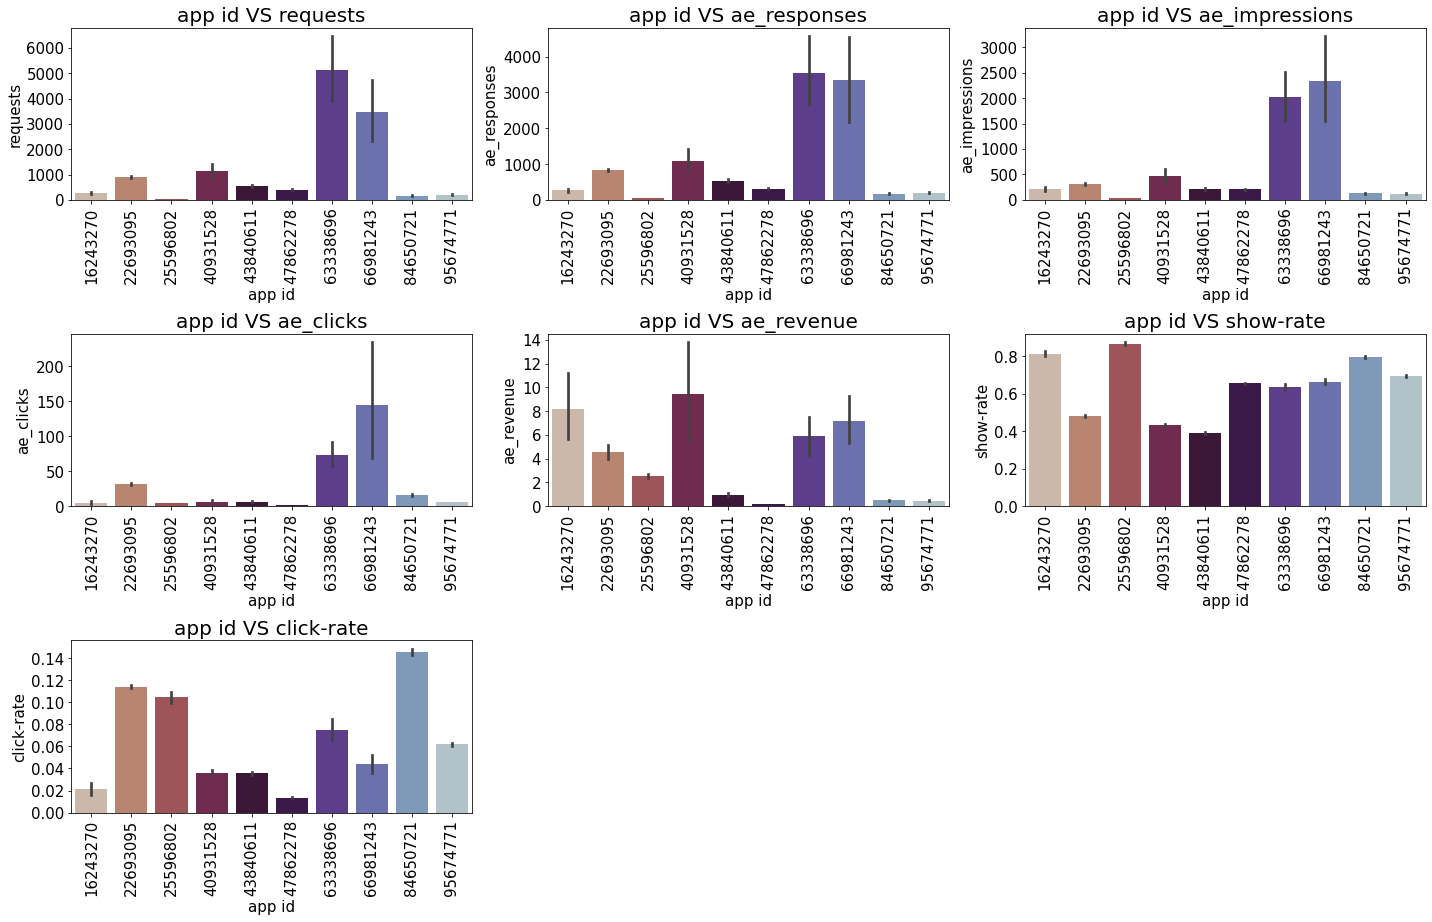

In [118]:
anom = ['requests','ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue','show-rate', 'click-rate']

plt.figure(figsize = [20,20])
for i in range (len(anom)):
    plt.subplot(5,3,i+1)
    sns.barplot(x=data['app_id'], y=data[anom[i]], palette="twilight_r")
    plt.title(f"app id VS {anom[i]}",fontsize= 20)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel('app id',fontsize = 15)
    plt.ylabel(anom[i],fontsize = 15)
    plt.tight_layout()

* The data is not normally distributed for above columns. The bar chart shows the uneven distribution of scattered data points in the columns.

* The app id ['63338696', '66981243] are having scatterd data in these columns. Potential anomalies or outliers are present in the data of these apps.

* For the column 'ae_revenue' the app id ['16243270', '22693095', '40931528', '63338696', '66981243'] are having scattered and the data is not normally distributed copmared to other apps. This can cause the uneven distribution and presence of outliers in the data distribution. 

#### Statistical Summary

In [119]:
#Describe of data
data.describe()

,pub_id,app_id,ad_unit_code,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show-rate,click-rate,Year,Month,Day
count,47935.000000,4.793500e+04,4.793500e+04,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000,47935.0,47935.0,47935.000000
mean,413.188213,5.015577e+07,2.268402e+10,585.827808,516.918202,257.055137,13.502514,2.098320,0.601830,0.064479,2022.0,10.0,15.610076
std,893.645657,2.465772e+07,1.215869e+08,3024.686475,2579.695718,1294.313552,73.922916,27.784254,0.236565,0.082324,0.0,0.0,9.037553
min,14.000000,1.624327e+07,2.247747e+10,16.000000,16.000000,16.000000,0.000000,0.000111,0.084906,0.000000,2022.0,10.0,1.000000
25%,14.000000,2.559680e+07,2.252151e+10,50.000000,47.000000,27.000000,0.000000,0.026047,0.411765,0.000000,2022.0,10.0,8.000000
50%,51.000000,4.786228e+07,2.275208e+10,109.000000,100.000000,52.000000,2.000000,0.112968,0.563190,0.035971,2022.0,10.0,16.000000
75%,72.000000,4.786228e+07,2.277034e+10,300.000000,275.000000,140.000000,7.000000,0.537878,0.826087,0.100000,2022.0,10.0,23.000000
max,2808.000000,9.567477e+07,2.283576e+10,156435.000000,156296.000000,69448.000000,6853.000000,2137.181915,1.000000,0.855072,2022.0,10.0,31.000000


<AxesSubplot:>

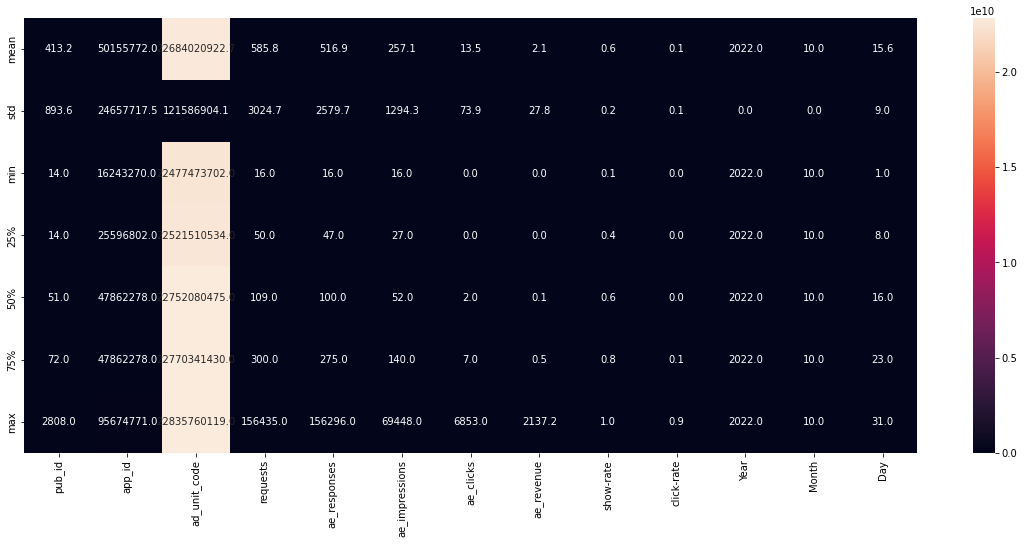

In [120]:
plt.figure(figsize=[20,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.1f')

Observations:

* The columns ['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue'] are having the mean value far higher than the median value. That means the data in these columns are right skewed.

* The columns ['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue'] having huge different between the 75 percentile and the max value. That means extreme outliers are present in the data of these columns. 

In [121]:
#correlation

Correlation = data.drop(['Year','Month'], axis = 1).corr()   #Column year and month are having the same data.
Correlation

,pub_id,app_id,ad_unit_code,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show-rate,click-rate,Day
pub_id,1.000000,-0.152765,-0.247525,-0.009083,-0.002112,-0.015005,-0.042381,-0.005701,-0.260785,-0.127512,0.030013
app_id,-0.152765,1.000000,-0.165087,-0.058509,-0.063884,-0.028819,-0.056324,-0.048791,0.327050,0.001122,-0.011783
ad_unit_code,-0.247525,-0.165087,1.000000,0.051644,0.061193,0.046765,0.056190,0.044630,-0.171178,0.060670,0.030186
requests,-0.009083,-0.058509,0.051644,1.000000,0.972617,0.928692,0.425497,0.569049,-0.077872,-0.024398,-0.015990
ae_responses,-0.002112,-0.063884,0.061193,0.972617,1.000000,0.941226,0.437700,0.640976,-0.088556,-0.022611,-0.015199
...,...,...,...,...,...,...,...,...,...,...,...
ae_clicks,-0.042381,-0.056324,0.056190,0.425497,0.437700,0.483948,1.000000,0.275070,-0.044085,0.142027,-0.004856
ae_revenue,-0.005701,-0.048791,0.044630,0.569049,0.640976,0.547998,0.275070,1.000000,-0.031551,0.022510,-0.000682
show-rate,-0.260785,0.327050,-0.171178,-0.077872,-0.088556,-0.013078,-0.044085,-0.031551,1.000000,0.036859,0.047812
click-rate,-0.127512,0.001122,0.060670,-0.024398,-0.022611,-0.028832,0.142027,0.022510,0.036859,1.000000,0.000305


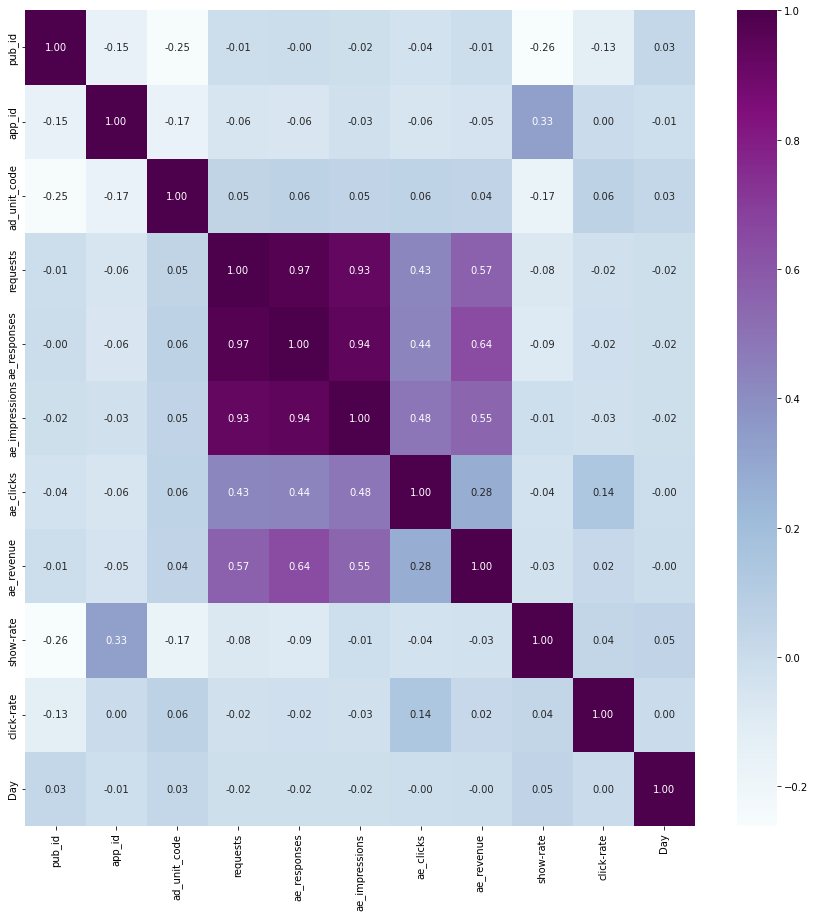

In [122]:
#Plotting the correlation of columns
plt.figure(figsize=[15,15])
sns.heatmap(Correlation,annot = True, fmt = '0.2f', cmap='BuPu')
plt.show()

ae_responses      0.640976
requests          0.569049
ae_impressions    0.547998
ae_clicks         0.275070
ad_unit_code      0.044630
click-rate        0.022510
Day              -0.000682
pub_id           -0.005701
show-rate        -0.031551
app_id           -0.048791
Name: ae_revenue, dtype: float64


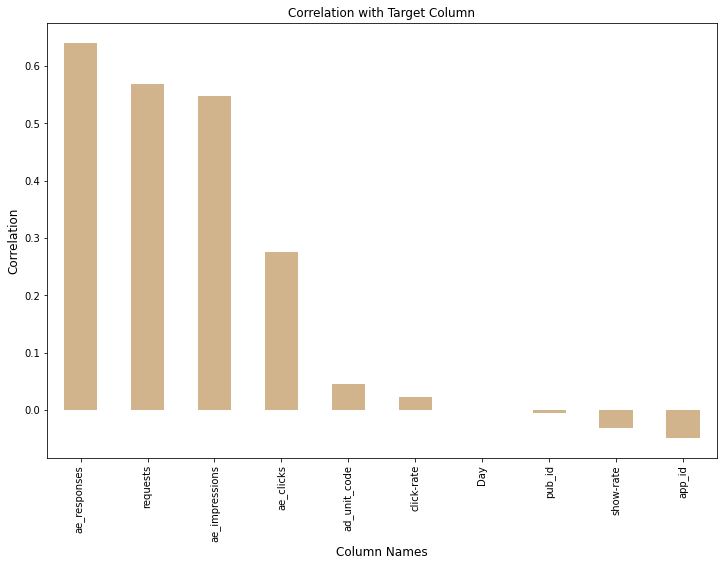

In [123]:
#Correlation with the column 'ae_revenue'

pd.set_option("display.max_rows", None)
print(Correlation['ae_revenue'].drop('ae_revenue').sort_values(ascending = False))
pd.set_option("display.max_rows", 10)
plt.figure(figsize = [12,8])
plt.subplot()
Correlation['ae_revenue'].sort_values(ascending= False).drop('ae_revenue').plot(kind = 'bar', color ='tan')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

* The columns ["ae_responses", "requests", "ae_impressions"] are having moderately high positive correlation to the column 'ae_revenue'. These are the major factors contributing to the revenue generated from each app.
* The columns ['ae_clicks, 'ad_unit_code','click-rate'] are having weak positive correlation to the column 'ae_revenue'. These features are not contributing or not making much impact on the revenue generation.
* The columns ['Day', 'app_id', 'show-rate', 'pub_id'] are having weak negative correlation to the column 'ae_revenue'.

#### Distribution of data in columns(Checking skewness of data)

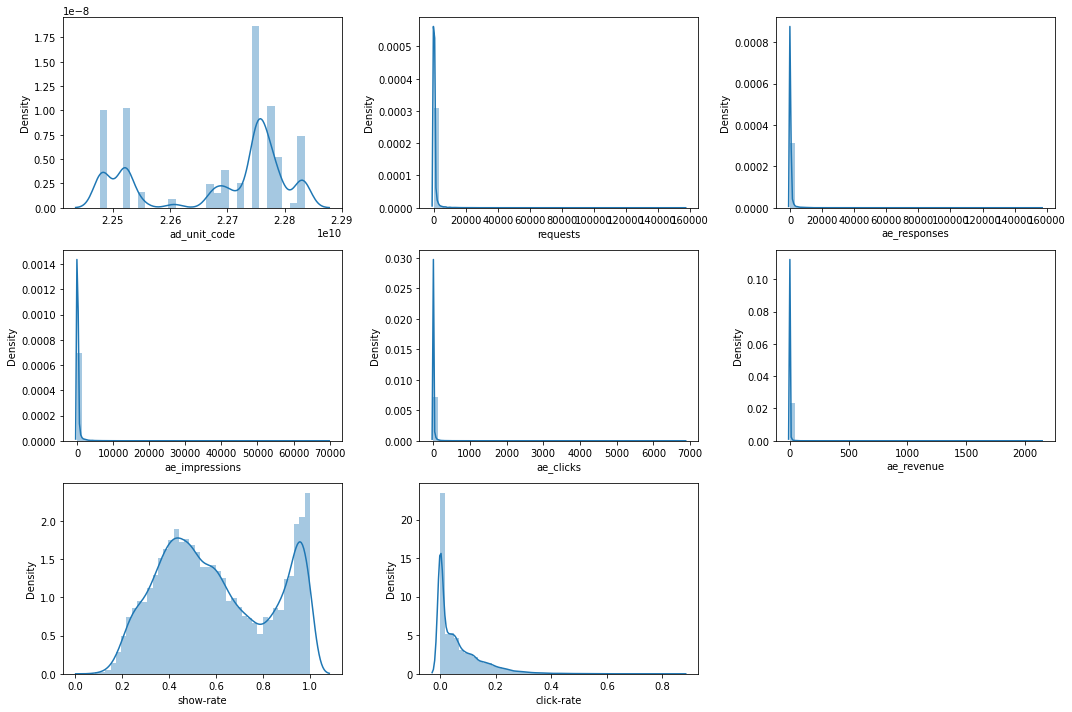

In [124]:
#Skewness of Numerical columns
impacting_cols = ['ad_unit_code', 'requests','ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue', 'show-rate', 'click-rate']
plt.figure(figsize = [15,10])
for i in range(0,len(impacting_cols)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[impacting_cols[i]])
    plt.tight_layout()

The columns ['ad_unit_code', 'requests','ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue', 'click-rate'] are having extreme positve skewness(right skewness).

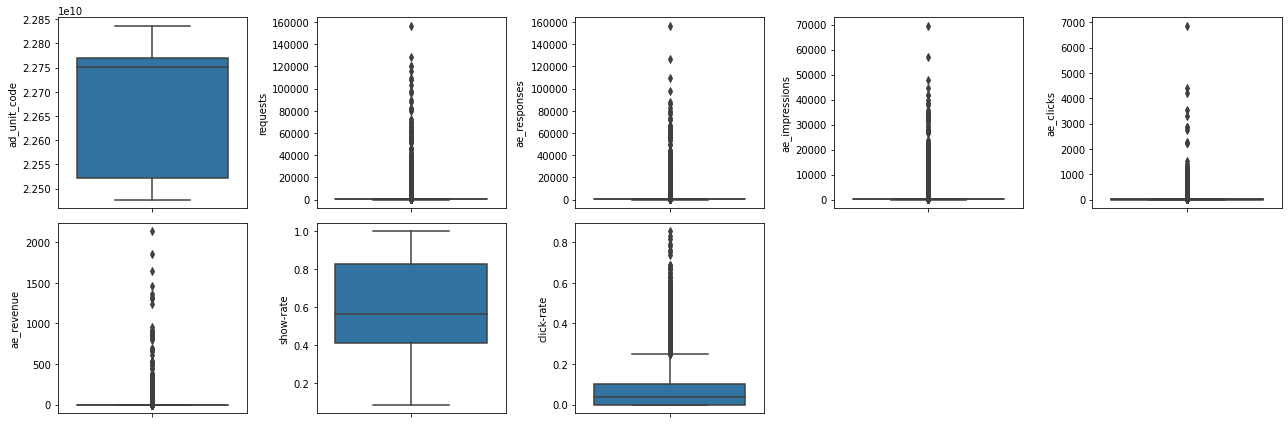

In [125]:
#Checking the Presence of Outliers in Data

#Plotting the data of numerical columns with boxplot to check the outliers
plt.figure(figsize = [18,6])
for i in range(0,len(impacting_cols)):
    plt.subplot(2,5,i+1)
    sns.boxplot(y = data[impacting_cols[i]])
    plt.tight_layout()

* Except the column 'ad_unit_code' and 'show-rate, the rest of columns are having extreme outliers in the data distribution.

In [154]:
grouped = data.groupby('app_id').agg({
    'requests': ['count', 'mean','median', 'std'],
    'ae_responses': ['mean','median', 'std'],
    'ae_impressions': ['mean','median', 'std'],
    'ae_clicks': ['mean','median', 'std'],
    'ae_revenue': ['mean','median', 'std'],
    'click-rate' : ['mean','median', 'std'],
    'show-rate' : ['mean','median', 'std']
})

In [159]:
pd.set_option('display.max_columns',None)
grouped

requests                                   ae_responses         \
            count         mean median           std         mean median   
app_id                                                                    
16243270      521   276.543186   67.0    546.042551   269.406910   65.0   
22693095    11291   916.646798  276.0   2219.700406   837.816580  246.0   
25596802     1605    54.170717   36.0     56.907882    53.491589   36.0   
40931528     2317  1127.442814  135.0   7394.785083  1093.618472  132.0   
43840611     5442   553.852628  123.0   1655.384827   539.714994  117.0   
47862278    14949   399.051442  110.0   1540.302712   312.717506   95.0   
63338696      557  5108.245961   85.0  16542.975605  3546.883303   73.0   
66981243      289  3456.297578  103.0  10408.189446  3337.653979  103.0   
84650721     4906   173.941093   45.0    558.759372   168.015695   45.0   
95674771     6058   199.981017   69.0    627.345662   195.136018   68.0   

                       ae_impressions                       ae_clicks         \
                   std           mean median          std        mean median   
app_id                                                                         
16243270    530.689895     218.702495   51.0   457.273901    5.188100    0.0   
22693095   2051.768838     312.147905  105.0   652.856285   31.823399   10.0   
25596802     56.464061      44.754517   30.0    48.359788    4.922741    3.0   
40931528   7267.405032     473.421234   54.0  3185.662072    6.744066    0.0   
43840611   1637.205845     212.732819   41.0   745.134319    6.411981    1.0   
47862278   1025.136030     210.771690   54.0   780.879702    1.848150    0.0   
63338696  11539.447025    2019.030521   43.0  5951.042837   73.373429    2.0   
66981243  10117.364440    2342.543253   66.0  7168.943403  144.107266    0.0   
84650721    538.664569     132.532002   33.0   453.257044   16.445373    5.0   
95674771    600.833662     124.540938   46.0   365.727835    5.938594    2.0   

                     ae_revenue                       click-rate            \
                 std       mean    median         std       mean    median   
app_id                                                                       
16243270   26.657355   8.148402  0.618454   32.426024   0.021461  0.000000   
22693095   70.355925   4.533844  0.615439   32.079758   0.114328  0.097087   
25596802    7.052900   2.540601  1.060808    4.023725   0.104679  0.088235   
40931528   43.446895   9.452086  0.119854  101.904260   0.035845  0.000000   
43840611   22.179185   0.987452  0.038765    4.858916   0.035617  0.021277   
47862278    5.440702   0.213504  0.033616    0.871817   0.013303  0.000000   
63338696  213.115163   5.869165  0.104253   18.939473   0.074871  0.029851   
66981243  712.339942   7.189340  0.823126   17.457562   0.043918  0.000000   
84650721   49.586518   0.486597  0.178806    0.830389   0.145953  0.120842   
95674771   12.806797   0.473490  0.088397    1.598783   0.061825  0.047619   

                   show-rate                      
               std      mean    median       std  
app_id                                            
16243270  0.061050  0.811387  0.833333  0.157009  
22693095  0.080932  0.481527  0.443182  0.204658  
25596802  0.098308  0.867278  0.928571  0.153902  
40931528  0.065613  0.432560  0.419753  0.115559  
43840611  0.047533  0.390773  0.374282  0.143974  
47862278  0.026340  0.655716  0.655172  0.221796  
63338696  0.112299  0.636184  0.593750  0.202425  
66981243  0.071964  0.665172  0.666667  0.108499  
84650721  0.110015  0.796110  0.872445  0.185545  
95674771  0.061591  0.695554  0.622642  0.178474

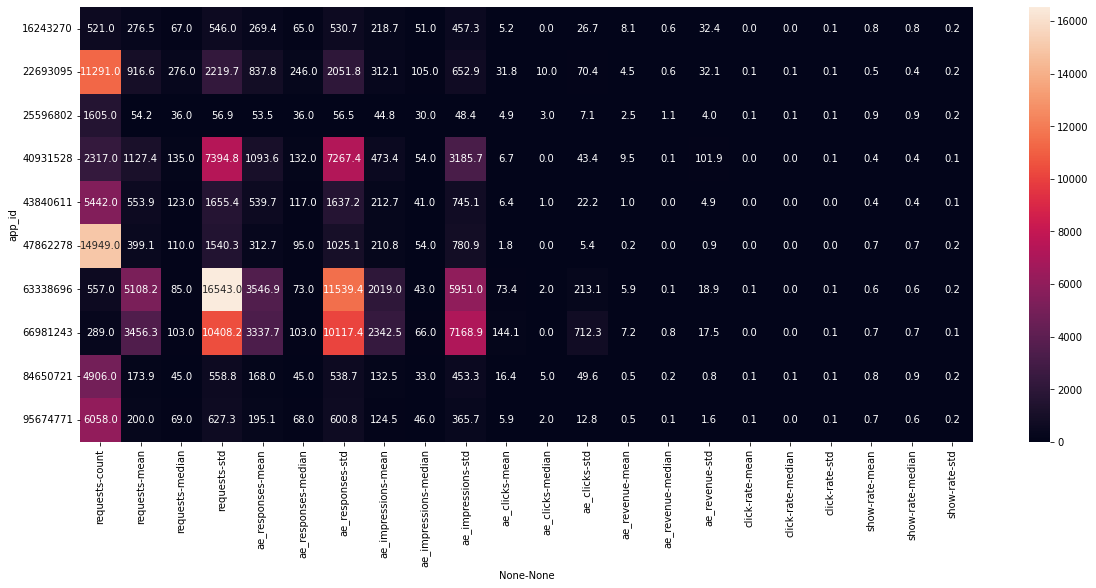

In [158]:
plt.figure(figsize=[20,8])
sns.heatmap(grouped,annot=True,fmt='0.1f')
plt.show()

* We can see that the app ids [40931528, 63338696, 66981243] are showing extreme anomalies in standard deviation for the columns ['requests', 'ae_responses', 'ae_impressions'] compared to other app ids.

In [228]:
from scipy.stats import zscore
x = data.drop(['date','country','app_id','pub_id','ad_unit_code','Year','Month'], axis = 1).copy()


df = x.copy()

z = np.abs(zscore(df))
z

,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show-rate,click-rate,Day
0,0.181782,0.186426,0.172336,0.182659,0.074236,1.448306,0.783239,0.485748
1,0.185749,0.191078,0.180835,0.182659,0.073205,1.507017,0.783239,0.485748
2,0.120071,0.167495,0.478208,0.087896,0.102417,1.357981,0.505905,0.485748
3,0.138916,0.151214,0.332956,1.630059,0.796449,0.662467,1.582643,0.485748
4,0.070364,0.089127,0.078077,0.087896,0.023793,0.246346,0.774096,0.485748
...,...,...,...,...,...,...,...,...
47930,0.182443,0.187202,0.182381,0.128548,0.074718,0.066862,1.530516,0.707049
47931,0.182443,0.187202,0.182381,0.182659,0.075095,0.066862,0.783239,0.707049
47932,0.178476,0.182550,0.182381,0.155603,0.075408,0.614250,0.373639,0.707049
47933,0.186741,0.192241,0.182381,0.115020,0.069785,1.683152,2.108955,0.707049


In [230]:
threshold = 3
df_new = df[(z<threshold).all(axis=1)]
df_new['date'] = data['date']
df_new['country'] = data['country']
df_new['app_id'] = data['app_id']
df_new['pub_id'] = data['pub_id']
df_new['ad_unit_code'] = data['ad_unit_code']
df_new['Year'] = data['Year']
df_new['Month']   = data['Month']
df_new

,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show-rate,click-rate,Day,date,country,app_id,pub_id,ad_unit_code,Year,Month
0,36,36,34,0,0.035738,0.944444,0.000000,20,2022-10-20,Tanzania,16243270,1987,22832846443,2022,10
1,24,24,23,0,0.064384,0.958333,0.000000,20,2022-10-20,Tanzania,16243270,1987,22832846593,2022,10
2,949,949,876,20,4.943878,0.923077,0.022831,20,2022-10-20,Thailand,16243270,1987,22832846443,2022,10
3,1006,907,688,134,24.226836,0.758545,0.194767,20,2022-10-20,Thailand,16243270,1987,22832846593,2022,10
4,373,287,156,20,2.759392,0.543554,0.128205,20,2022-10-20,Thailand,16243270,1987,22832827729,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47930,34,34,21,4,0.022347,0.617647,0.190476,22,2022-10-22,El Salvador,95674771,14,22770341049,2022,10
47931,34,34,21,0,0.011894,0.617647,0.000000,22,2022-10-22,Jordan,95674771,14,22770341430,2022,10
47932,46,46,21,2,0.003189,0.456522,0.095238,22,2022-10-22,Somalia,95674771,14,22770341430,2022,10
47933,21,21,21,5,0.159408,1.000000,0.238095,22,2022-10-22,Portugal,95674771,14,22770341598,2022,10


In [231]:
df['date'] = data['date']
df['country'] = data['country']
df['app_id'] = data['app_id']
df['pub_id'] = data['pub_id']
df['ad_unit_code'] = data['ad_unit_code']
df['Year'] = data['Year']
df['Month']   = data['Month']
df

,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show-rate,click-rate,Day,date,country,app_id,pub_id,ad_unit_code,Year,Month
0,36,36,34,0,0.035738,0.944444,0.000000,20,2022-10-20,Tanzania,16243270,1987,22832846443,2022,10
1,24,24,23,0,0.064384,0.958333,0.000000,20,2022-10-20,Tanzania,16243270,1987,22832846593,2022,10
2,949,949,876,20,4.943878,0.923077,0.022831,20,2022-10-20,Thailand,16243270,1987,22832846443,2022,10
3,1006,907,688,134,24.226836,0.758545,0.194767,20,2022-10-20,Thailand,16243270,1987,22832846593,2022,10
4,373,287,156,20,2.759392,0.543554,0.128205,20,2022-10-20,Thailand,16243270,1987,22832827729,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47930,34,34,21,4,0.022347,0.617647,0.190476,22,2022-10-22,El Salvador,95674771,14,22770341049,2022,10
47931,34,34,21,0,0.011894,0.617647,0.000000,22,2022-10-22,Jordan,95674771,14,22770341430,2022,10
47932,46,46,21,2,0.003189,0.456522,0.095238,22,2022-10-22,Somalia,95674771,14,22770341430,2022,10
47933,21,21,21,5,0.159408,1.000000,0.238095,22,2022-10-22,Portugal,95674771,14,22770341598,2022,10


In [242]:
cols = [col for col in df.columns if col != 'app_id']
merged_df = df.merge(df_new[cols], on = cols, how = 'left', indicator = 'True')

anomalies = merged_df[merged_df['True'] == 'left_only']
anomalies

,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show-rate,click-rate,Day,date,country,app_id,pub_id,ad_unit_code,Year,Month,True
42,533,533,401,3,87.282870,0.752345,0.007481,25,2022-10-25,United States,16243270,1987,22832846593,2022,10,left_only
61,1864,1708,1244,337,55.065508,0.728337,0.270900,21,2022-10-21,Thailand,16243270,1987,22832846593,2022,10,left_only
62,839,839,690,59,97.295523,0.822408,0.085507,21,2022-10-21,United States,16243270,1987,22832846593,2022,10,left_only
67,37,37,19,12,0.358095,0.513514,0.631579,21,2022-10-21,Kenya,16243270,1987,22832846593,2022,10,left_only
125,1324,1322,1015,9,198.539550,0.767776,0.008867,27,2022-10-27,United States,16243270,1987,22832846593,2022,10,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47192,35,35,23,9,0.053943,0.657143,0.391304,6,2022-10-06,Armenia,95674771,14,22770341049,2022,10,left_only
47238,8057,7709,4626,101,1.049676,0.600078,0.021833,6,2022-10-06,India,95674771,14,22770341430,2022,10,left_only
47268,79,79,38,13,0.148197,0.481013,0.342105,6,2022-10-06,Morocco,95674771,14,22770341049,2022,10,left_only
47397,9117,8636,5035,86,0.690555,0.583025,0.017080,28,2022-10-28,India,95674771,14,22770341430,2022,10,left_only


In [246]:
grouped = anomalies.groupby('app_id').agg({
    'requests': ['count', 'mean','median', 'std'],
    'ae_responses': ['mean','median', 'std'],
    'ae_impressions': ['mean','median', 'std'],
    'ae_clicks': ['mean','median', 'std'],
    'ae_revenue': ['mean','median', 'std'],
    'click-rate' : ['mean','median', 'std'],
    'show-rate' : ['mean','median', 'std']
})

grouped

requests                                       ae_responses           \
            count          mean   median           std          mean   median   
app_id                                                                          
16243270       18   1688.333333   1750.5   1244.990858   1625.500000   1639.0   
22693095      573   5482.340314   3410.0   7403.548941   4961.593368   3111.0   
25596802       52     50.576923     34.0     36.098094     46.961538     33.5   
40931528       62  30465.967742  17630.0  34012.055390  29540.500000  17307.0   
43840611       57  12016.421053  11634.0   6214.729255  11968.350877  11618.0   
47862278      117  13632.188034  11841.0   8050.725093   9389.307692   8900.0   
63338696      117  23345.094017  12276.0  29723.792633  16162.059829   9566.0   
66981243       34  27317.676471  22410.5  16669.918045  26357.647059  22384.0   
84650721      477    588.465409     43.0   1402.542642    581.815514     43.0   
95674771       46   3022.934783     46.5   3962.215017   2898.304348     46.0   

                       ae_impressions                           ae_clicks  \
                   std           mean   median           std         mean   
app_id                                                                      
16243270   1209.419951    1281.611111   1216.0   1032.730825    74.388889   
22693095   6859.453680    1661.502618   1569.0   2043.732157   187.884817   
25596802     31.004087      29.692308     24.5     15.135387    11.134615   
40931528  33798.730626   12911.419355   7755.0  14837.045556   122.403226   
43840611   6220.892883    5676.912281   5187.0   3040.447654   132.298246   
47862278   4634.042410    6727.495726   5428.0   4594.734000    36.316239   
63338696  20806.957897    9241.940171   6509.0  10132.394079   326.042735   
66981243  16491.612911   18641.794118  16238.5  11718.631174  1193.294118   
84650721   1387.610787     484.482180     27.0   1208.100623    63.989518   
95674771   3802.098695    1709.456522     26.0   2241.124378    32.173913   

                              ae_revenue                        click-rate  \
         median          std        mean     median         std       mean   
app_id                                                                       
16243270   15.0   114.328288  125.842676  99.961370  120.608119   0.150764   
22693095  127.0   224.736553   47.688350   2.468070  133.443215   0.245691   
25596802    9.0     5.412509    2.334055   1.729639    2.065925   0.384064   
40931528   11.5   225.965503  334.396785  60.087220  532.661922   0.104055   
43840611  137.0    79.103451   16.412219  12.659797   12.779026   0.065445   
47862278   32.0    18.108699    2.787053   1.287945    3.691511   0.022179   
63338696  237.0   366.151900   26.408085  14.921591   34.050474   0.147002   
66981243   59.0  1772.673422   48.072659  45.587861   25.673387   0.068628   
84650721   11.0   130.103409    0.941025   0.213086    1.643371   0.364056   
95674771   10.0    32.860178    0.411462   0.153206    0.447820   0.238666   

                             show-rate                      
            median       std      mean    median       std  
app_id                                                      
16243270  0.080419  0.185010  0.719147  0.751749  0.139276  
22693095  0.224972  0.144399  0.503715  0.453853  0.216204  
25596802  0.357265  0.089153  0.693324  0.646110  0.172379  
40931528  0.005083  0.159635  0.441226  0.450510  0.088535  
43840611  0.024800  0.115009  0.465288  0.453943  0.092969  
47862278  0.004958  0.076129  0.728013  0.784314  0.240970  
63338696  0.067762  0.179220  0.626164  0.566667  0.184654  
66981243  0.003316  0.098750  0.702109  0.693258  0.062265  
84650721  0.360000  0.128550  0.724789  0.724138  0.162868  
95674771  0.315789  0.178004  0.644357  0.593097  0.156299

These are the outlier records present in the ADX dataset.

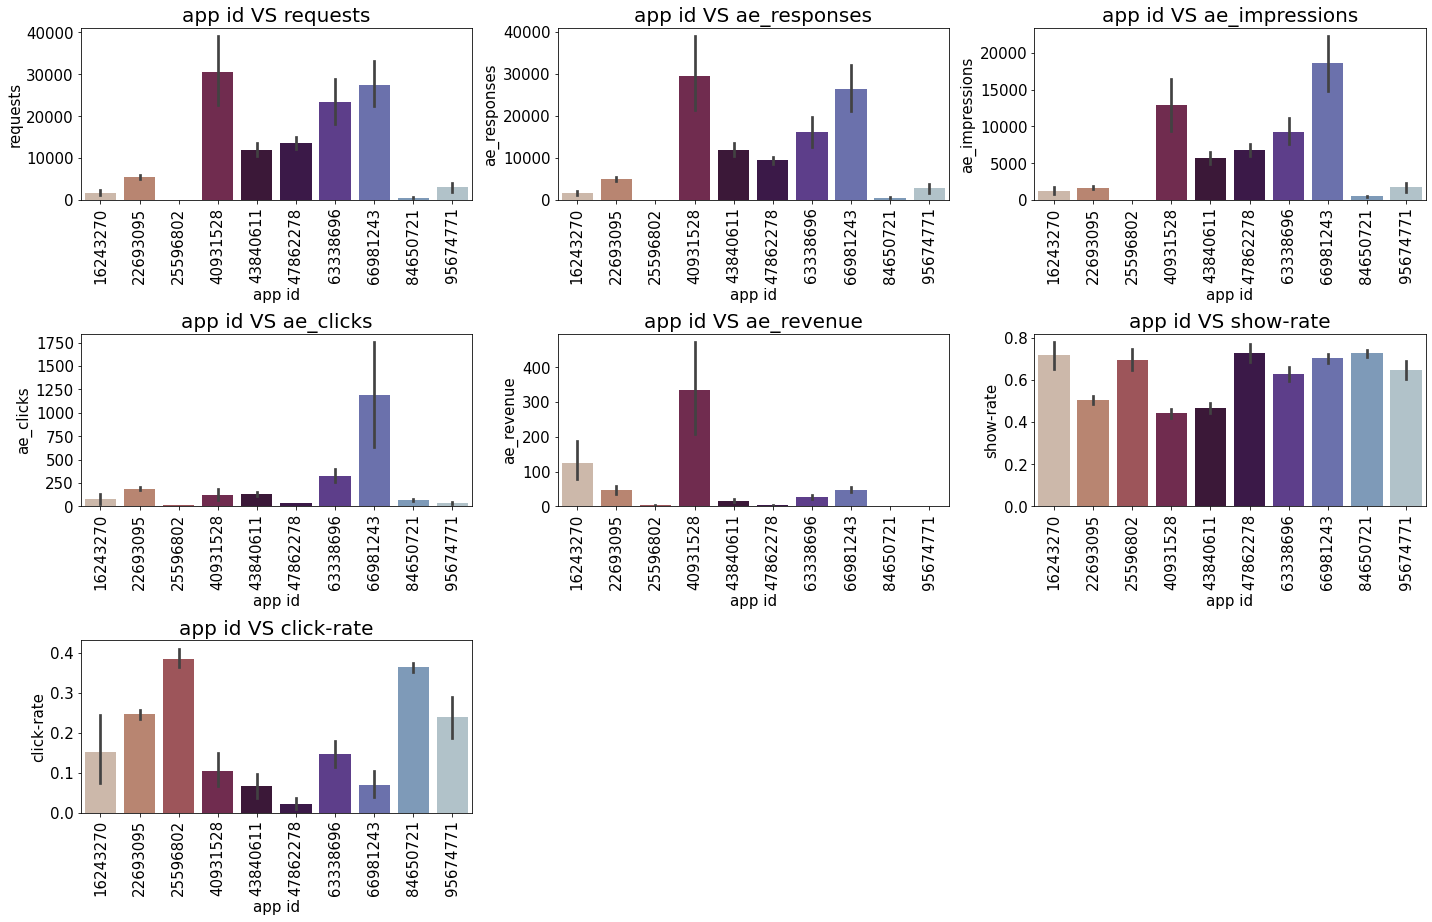

In [250]:
anom = ['requests','ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue','show-rate', 'click-rate']

plt.figure(figsize = [20,20])
for i in range (len(anom)):
    plt.subplot(5,3,i+1)
    sns.barplot(x=anomalies['app_id'], y=anomalies[anom[i]], palette="twilight_r")
    plt.title(f"app id VS {anom[i]}",fontsize= 20)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel('app id',fontsize = 15)
    plt.ylabel(anom[i],fontsize = 15)
    plt.tight_layout()

### Findings

App ids with corresponding column of outlier data points.

* In the column ["requests", "ae_response", "ae_impressios"] the app ids ['0931528', '43840611', '47862278','63338696', '66981243'] are having extreme outlier data points.
* In the column 'ae_clicks' the app id "66981243" is having extreme outlier data points.
* In the column, "ae_revenue" the app ids ['16243270', '40931528'] are having extreme outlier data points.
* In the column, "show-rate". almost all app ids are having similar data point distribution some outlier data points.
* In the column, "click-rate", the app ids ['16243270', '95674771', '25596802', '63338696'] are having extreme outlier data points.

In [253]:
anomalies.to_csv("apps_with_anomalies(outliers).csv", index = False)